# Import Libraries

In [39]:
import numpy as np
import pandas as pd
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Context:

A large e-commerce company has contracted us to provide delivery services from several of their warehouses(or sites) to customers' doorsteps at several locations across the country.

The dataset contains information about the performance of our delivery agents working at our client's sites across cities in India.

The idea of this exercise is to gain insights into their performance and make data driven strategic recommendations for imporvement.

***NOTE: The dataset contains information for only one month, i.e June 2023***

# Features in the Dataset
* Site Code - A unique ID belonging to the site at which our delivery agents work.
* City - Name of the city in which the site is located.
* Vehicle Type - "Van DCD" means the delivery agent drives his own van and delivers packages. "Bike" means the delivery agent rides his own bike and delivers packages. "Van D+DA" means the delivery agent doesn't drive, but is instead driven around the city by a van driver.
* Cluster - Cities are grouped into clusters based on certain characteristics.
* Date - The date that the delivery agent reported for work.
* Delivery Agent ID - A unique identifier assigned to each delivery agent who works with us.
* Shift - "A" indicates morning, "B" indicates afternoon, "C" indicates evening.
* Unsuccessful_Attempts - The number of packages that the delivery agent attempted to deliver, but the delivery was not possible for various reasons
* Process_Deviations - The number of times the delivery agent deviated from the process during the shift.
* Delivered - The number of packages that the delivery agent delivered during the shift.
* Customer_Rejects - The number of packages that customers rejected when the delivery agent went to deliver them.
* Picked_up_Customer_Returns - The number of packages the delivery agent picked up from customers who wanted to return something that they had ordered earlier.
* Picked_up_Seller - The number of packages that the delivery agent picked up from sellers on the platform. These packages would be sent out for delivery to customers the next day.
* billing_amt - The amount that we bill our clients for the services rendered by our delivery agents.


# Question 1

Load the dataset into a dataframe and name it "daily_df". Display a sample of 10 random rows, display the shape of the dataset, the datatypes of each column, and check for missing values.

In [40]:
#Reading the data and loading the xlsx file into the dataframe named daily_df

daily_df = pd.read_excel("Python Ninja - Advanced - Dataset.xlsx")

# Display sample of 10 random rows in the dataframe

daily_df.sample(n = 10)

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt
7773,Site_17,DELHI,Bike,6,2023-06-02,DA_139,B,0,0,21,0,2,0,811
9656,Site_14,MUMBAI,Bike,3,2023-06-24,DA_472,C,11,0,1,4,2,0,516
2171,Site_26,MUMBAI,Van D+DA,5,2023-06-24,DA_516,B,2,0,36,1,0,0,1639
9721,Site_18,DELHI,Bike,6,2023-06-11,DA_519,B,0,0,29,0,2,0,827
2598,Site_21,HYDERABAD,Van DCD,4,2023-06-24,DA_107,A,0,0,0,0,59,0,1968
2873,Site_26,MUMBAI,Bike,3,2023-06-06,DA_565,A,3,2,9,0,33,0,929
7064,Site_9,BANGALORE,Bike,4,2023-06-12,DA_555,C,8,0,14,1,4,0,577
1145,Site_25,MUMBAI,Van D+DA,5,2023-06-23,DA_490,A,3,0,87,2,4,0,2370
7700,Site_3,BANGALORE,Bike,4,2023-06-04,DA_675,C,3,0,20,1,4,0,595
3849,Site_27,MUMBAI,Van D+DA,5,2023-06-26,DA_522,B,6,0,27,0,0,0,1619


In [41]:
#display the shape of the dataset
daily_df.shape

(11279, 14)

In [42]:
daily_df['cluster'].value_counts()

cluster
4    7043
3    1722
5    1120
6    1043
1     351
Name: count, dtype: int64

In [43]:
#checking the datatype of each column

daily_df.dtypes


Site Code                             object
city                                  object
Vehicle_type                          object
cluster                                int64
Date                          datetime64[ns]
Delivery Agent ID                     object
Shift                                 object
Unsuccessful_Attempts                  int64
Process_Deviations                     int64
Delivered                              int64
Customer_Rejects                       int64
Picked_up_Customer_Returns             int64
Picked up_Seller                       int64
billing_amt                            int64
dtype: object

In [5]:
#checking for null values in all the features/columns
daily_df.isnull().sum()

Site Code                     0
city                          0
Vehicle_type                  0
cluster                       0
Date                          0
Delivery Agent ID             0
Shift                         0
Unsuccessful_Attempts         0
Process_Deviations            0
Delivered                     0
Customer_Rejects              0
Picked_up_Customer_Returns    0
Picked up_Seller              0
billing_amt                   0
dtype: int64

In [6]:
#Getting all the information at once using .info()
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11279 entries, 0 to 11278
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Site Code                   11279 non-null  object        
 1   city                        11279 non-null  object        
 2   Vehicle_type                11279 non-null  object        
 3   cluster                     11279 non-null  int64         
 4   Date                        11279 non-null  datetime64[ns]
 5   Delivery Agent ID           11279 non-null  object        
 6   Shift                       11279 non-null  object        
 7   Unsuccessful_Attempts       11279 non-null  int64         
 8   Process_Deviations          11279 non-null  int64         
 9   Delivered                   11279 non-null  int64         
 10  Customer_Rejects            11279 non-null  int64         
 11  Picked_up_Customer_Returns  11279 non-null  int64     

In [7]:
daily_df.columns

Index(['Site Code', 'city', 'Vehicle_type', 'cluster', 'Date',
       'Delivery Agent ID', 'Shift', 'Unsuccessful_Attempts',
       'Process_Deviations', 'Delivered', 'Customer_Rejects',
       'Picked_up_Customer_Returns', 'Picked up_Seller', 'billing_amt'],
      dtype='object')

#### Q1 Explanation: 
All the basic properties of the dataset can be seen at once using daily_df.info() which gives the information of datatypes,number of columns and rows (indirectly shape of the dataframe). I have shown both the individual code lines to check the datatypes,shape and null values seperately as well as in a single attempt using daily_df.info()

# Question 2

**Part-A**

You will notice that there are delivery agents who have used different vehicle types in different shifts.

Find what vehicle type was used for majority of the shifts, then overwrite all the other minority values with the majority values.

For example - if DA_1 used a bike in 20 shifts and used a van in 2 shifts, you need to make sure that the "Vehicle Type" for all 22 shifts is set to "Bike" as that was used for majority of the shifts.

In [8]:
# Grouping data based on delivery agent id, vehicle type to get the count of different vehicle types used by the delivery agents
vehicle_counts = daily_df.groupby('Delivery Agent ID')['Vehicle_type'].value_counts().unstack()

# Replacing minority vehicle class with majority vehicle class for each delivery agent ID
for da_id in vehicle_counts.index:
    majority_vehicle = vehicle_counts.loc[da_id].idxmax()
    minority_vehicles = vehicle_counts.loc[da_id].drop(majority_vehicle).index
    
    # Replace minority vehicle class with majority vehicle class for the selected delivery agent IDs
    mask = (daily_df['Delivery Agent ID'] == da_id) & (daily_df['Vehicle_type'].isin(minority_vehicles))
    daily_df.loc[mask, 'Vehicle_type'] = majority_vehicle

# Display the dataframe after replacing the minority vehicle class with the majority vehicle class
daily_df.head()


,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353


#### Part-A: Explanation: 
 
group by operation has been done on the columns 'Vehicle_type' and'Delivery Agent ID' and count has been taken for each 'Vehicle_type' wrt 'Delivery Agent ID'. Later a for loop has been run to iterate over each 'Delivery Agent ID' to replace minority vehicle class with majority vehicle class

**Part-B:**

Total assigned packages can be calculated using the following formula:

Total Assigned = Unsuccessful_Attempts + Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller

Use this formula and add a new column in the dataframe called "Total Assigned"

In [9]:
# Calculate Total Assigned using the provided formula
daily_df['Total Assigned'] = (
    daily_df['Unsuccessful_Attempts'] +
    daily_df['Delivered'] +
    daily_df['Customer_Rejects'] +
    daily_df['Picked_up_Customer_Returns'] +
    daily_df['Picked up_Seller']
)

# Display the dataframe 
print("DataFrame with 'Total Assigned' column:")
daily_df.head()


DataFrame with 'Total Assigned' column:


,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955,30
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075,81
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571,19
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275,16
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353,46


* Total assigned deliveries hass been calculated using Unsuccessful_Attempts + Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller
* this gives the insights on workload assigned to the delivery agents

**Part-C:**

"Productivity" is a metric that aims at measuring how much work a delivery agent is doing during his shift. This can later be compared with the rest of the workforce to identify delivery agents who are both - outperforming as well as under performing.  

It can be calculated using the following formula:

Productivity = Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller.

Calculate "Productivity" and show it in a new column in the daily_df.


In [10]:
#productivity column derived using the formula 'Productivity = Delivered + Customer_Rejects + Picked_up_Customer_Returns + Picked up_Seller.'

daily_df['Productivity'] = (
    daily_df['Delivered']
    + daily_df['Customer_Rejects']
    + daily_df['Picked_up_Customer_Returns']
    + daily_df['Picked up_Seller']
)

daily_df.head()

,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955,30,30
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075,81,81
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571,19,17
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275,16,15
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353,46,41


* productivity is calculated using the given formula to get the insights on the performance of the delivery agents when compared with the assigned deliveries

**Part-D:**

Analyze the data and report the ranges of productivity that different vehicle types have in different types of shifts.

In [11]:
# Group by Vehicle_Type and Shift_Type and calculate the range of Productivity
grouped_data = daily_df.groupby(['Vehicle_type', 'Shift']).agg({'Productivity': ['min', 'max', 'mean', 'median']}).reset_index()

# Rename the columns for better readability and round the 'Mean_Productivity' column to 2 decimal places
grouped_data.columns = ['Vehicle_Type', 'Shift', 'Min_Productivity', 'Max_Productivity', 'Mean_Productivity', 'Median_Productivity']
grouped_data['Mean_Productivity'] = grouped_data['Mean_Productivity'].round(2)

# Display the result
print("Ranges of Productivity for Different Vehicle Types in Different Shifts:")
grouped_data


Ranges of Productivity for Different Vehicle Types in Different Shifts:


,Vehicle_Type,Shift,Min_Productivity,Max_Productivity,Mean_Productivity,Median_Productivity
0,Bike,A,20,177,44.25,43.0
1,Bike,B,15,149,33.68,33.0
2,Bike,C,1,86,22.69,22.0
3,Van D+DA,A,31,108,79.34,81.0
4,Van D+DA,B,15,86,37.01,36.0
5,Van D+DA,C,8,39,23.63,23.0
6,Van DCD,A,1,338,86.51,77.0
7,Van DCD,B,1,161,31.40,28.0
8,Van DCD,C,10,97,26.40,23.5


* Productivity ranges have been calculated to get the insights on the range of the features in the data. (Data cleaning for removal of outliers has not been carried out in the present analysis). It is assumed that the data is alreeady clean to perform analysis.

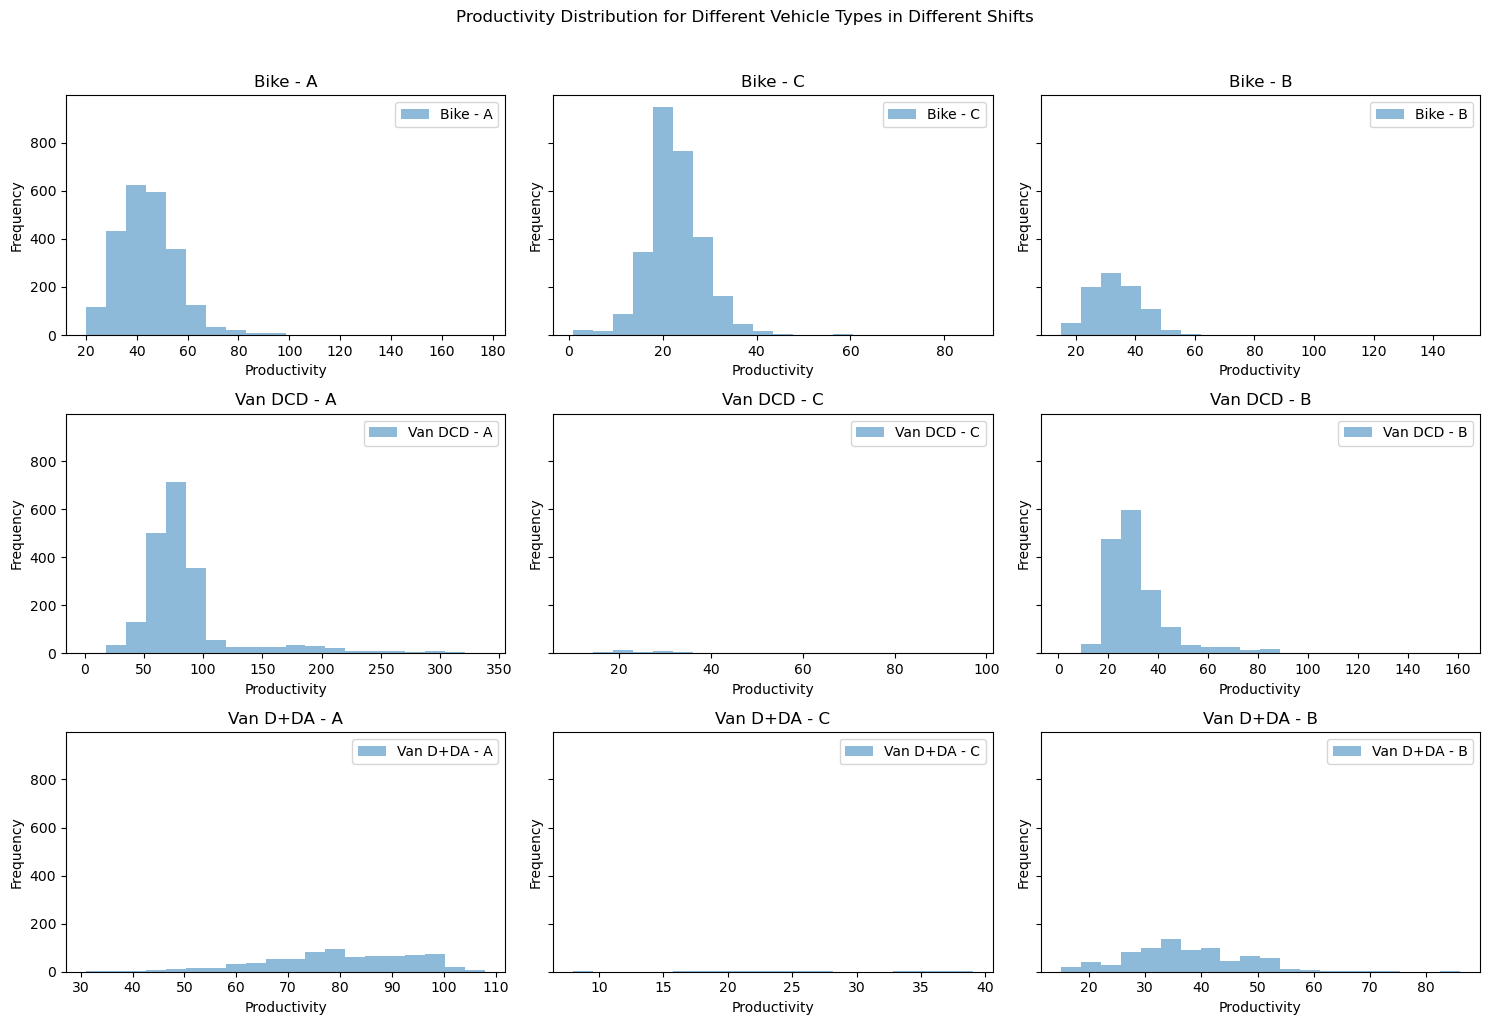

In [12]:
# Get unique vehicle types and shift types
vehicle_types = daily_df['Vehicle_type'].unique()
shift_types = daily_df['Shift'].unique()

# Create subplots based on the number of vehicle types and shift types
fig, axes = plt.subplots(nrows=len(vehicle_types), ncols=len(shift_types), figsize=(15, 10), sharey=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each combination of vehicle type and shift type
for i, vehicle_type in enumerate(vehicle_types):
    for j, shift_type in enumerate(shift_types):
        subset = daily_df[(daily_df['Vehicle_type'] == vehicle_type) & (daily_df['Shift'] == shift_type)]
        axes[i * len(shift_types) + j].hist(subset['Productivity'], bins=20, alpha=0.5, label=f'{vehicle_type} - {shift_type}')
        axes[i * len(shift_types) + j].set_title(f'{vehicle_type} - {shift_type}')
        axes[i * len(shift_types) + j].set_xlabel('Productivity')
        axes[i * len(shift_types) + j].set_ylabel('Frequency')
        axes[i * len(shift_types) + j].legend()

plt.suptitle('Productivity Distribution for Different Vehicle Types in Different Shifts', y=1.02)
plt.tight_layout()
plt.show()


***Explain briefly what you have observed about the productivity of different vehicles in different shifts***

 ## Observations from the descriptive statistics    
        
 * Here as we observe shift A indicates morning and All the delivery modes Bike,van D+DA, van DCD are showing high productivity levels because of various factors like lesser traffic in the early hours and also depends upon location(site), better working energy levels in the starting of the day.
 
* Shift B is having productivity levels in a moderate range for all types of delivery vehicles may be because of mid-day breaks and climatic conditions (midday heat)

* Shift C is having less productivity levels when compared to the other shifts which can be like due to reduced human productivity or increased traffic or may be deliveries assigned for the day are mostly completed before the evening which allows only few deliveries in the shift C

* if we observe on an average Van with Delivery agent and driver (Van D+DA)is more productive as the delivery agent can efficiently work on optimizing the routes to guide the driver and can organize or plan the deliveries.

* Bike on an average shows less but consistant productivity among all the three shifts as it is always easy to handle deliveries on bikes in cities compared to the other two modes of van.Also we should not ethat the delivery on bikes depends upon day light availability, weather conditions


**Part E:**

Low productivity adversely affects both - service levels as well as unit level economics of the business. Curbing this is quintessential to running a good operation.

Now that you have a sense of the productivity levels of different vehicle types in each shift, use this information to formulate logic to classify all the samples across all shifts as either "productivity-ok" or "productivity-low". Add this information into a column called "Productivity Category".

* Keep in mind that the productivity of one vehicle type is not comparable to the other. A bike may travel faster when there is more traffic. A van may be able to carry a much larger number of packages, etc...

* Keep in mind that productivity from Shift A is not comparable to productivity from Shifts B or C or vice versa. Each shift should have it's own threshold for defining low productivity.

* Most importantly, keep in mind that the ideal solution would be to identify a smaller set of people who contribute to the largest part of the problem.

* You are not being given any specific formula here to do this. You will need to think creatively and come up with an appropriate method.

In [13]:
# Create a new column 'Productivity Category' with initial values
daily_df['Productivity Category'] = 'productivity-ok'

# Define a function to classify productivity category based on thresholds
def classify_productivity(row):
    vehicle_type = row['Vehicle_type']
    shift_type = row['Shift']
    productivity = row['Productivity']  # Use the 'Productivity' column for classification

    # Get shift-specific statistics for the current vehicle type and shift
    shift_stats = daily_df[(daily_df['Vehicle_type'] == vehicle_type) & (daily_df['Shift'] == shift_type)]['Productivity'].describe()

    # Define a threshold (e.g., 25th percentile)
    threshold = shift_stats['25%']

    # Classify as 'productivity-low' if below the threshold
    if productivity < threshold:
        return 'productivity-low'
    else:
        return 'productivity-ok'

# Apply the classification function to each row
daily_df['Productivity Category'] = daily_df.apply(classify_productivity, axis=1)
daily_df.head()


,Site Code,city,Vehicle_type,cluster,Date,Delivery Agent ID,Shift,Unsuccessful_Attempts,Process_Deviations,Delivered,Customer_Rejects,Picked_up_Customer_Returns,Picked up_Seller,billing_amt,Total Assigned,Productivity,Productivity Category
0,Site_22,HYDERABAD,Bike,4,2023-06-27,DA_280,A,0,0,3,1,26,0,955,30,30,productivity-low
1,Site_10,BANGALORE,Van DCD,4,2023-06-08,DA_273,A,0,9,60,1,20,0,2075,81,81,productivity-ok
2,Site_3,BANGALORE,Bike,4,2023-06-25,DA_370,C,2,0,15,0,2,0,571,19,17,productivity-low
3,Site_10,BANGALORE,Van DCD,4,2023-06-22,DA_118,B,1,0,15,0,0,0,1275,16,15,productivity-low
4,Site_4,BANGALORE,Van DCD,4,2023-06-11,DA_136,B,5,0,40,1,0,0,1353,46,41,productivity-ok


***Explain briefly the logic you have used to solve the question above***

As we were notified that the productivity levels differs for different vehicles and shifts too...

Step_1: A new column named 'Productivity Category' is created with initial values set to 'productivity-ok' for all samples.

step_2:  A function named classify_productivity is defined to determine the 'Productivity Category' for each row.

Step-3:  Shift-specific statistics (mean, median, etc.) for 'Productivity' are calculated for the current 'Vehicle_Type' and 'Shift' combination using the describe() function.

step-4:  A threshold is set as 25th percentile and The function checks if the 'Productivity' for the current sample is below the threshold. If it is, the 'Productivity Category' is set to 'productivity-low'; otherwise, it remains 'productivity-ok'.(here the percentile should be decided based on business requirements and perspective like for considering productivity if an average performance is seen in most of the delivery agents or their work load or their shifts and delivery mode. With the given information I have choosen 25th percentile)

 

This dynamic approach allows for shift-specific classification, recognizing that productivity levels vary between different vehicle types and shifts. The resulting classification can assist in identifying instances of low productivity for targeted improvement efforts.





# Question 3

**Part A:**

The daily_df contains information of how each delivery agent performed on each day that they reported in June 2023. Create a new dataframe that summarizes the performance of each delivery agent for the entire month, using the data from the daily_df.

Name this new dataframe "monthly_df".

The new dataframe should contain the following columns:
* Delivery Agent ID
* Vehicle Type
* Cluster
* City
* Site Code
* No. of Shifts Worked
* Total Assigned
* Unsuccessful_Attempts
* Process_Deviations
* Productivity
* billing_amt

In [14]:
# Grouped the data by Delivery Agent ID to calculate monthly summaries
monthly_df = daily_df.groupby('Delivery Agent ID').agg({
    'Vehicle_type': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'cluster': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'city': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Site Code': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Shift': 'count',
    'Total Assigned': 'sum',
    'Unsuccessful_Attempts': 'sum',
    'Process_Deviations': 'sum',
    'Productivity': 'sum',
    'billing_amt': 'sum'
}).reset_index()

# Rename columns for clarity
monthly_df.columns = [
    'Delivery Agent ID',
    'Vehicle_type',
    'Cluster',
    'City',
    'Site Code',
    'No. of Shifts Worked',
    'Total Assigned',
    'Unsuccessful_Attempts',
    'Process_Deviations',
    'Productivity',
    'Total Billing Amount'
]

# Display or print the resulting monthly_df
print("Monthly Summary of Delivery Agent Performance for June 2023:")
monthly_df.head()


Monthly Summary of Delivery Agent Performance for June 2023:


,Delivery Agent ID,Vehicle_type,Cluster,City,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,Total Billing Amount
0,DA_1,Bike,6,DELHI,Site_29,22,1077,46,35,1031,23594
1,DA_10,Van DCD,4,BANGALORE,Site_3,15,759,69,13,690,25944
2,DA_100,Bike,4,HYDERABAD,Site_19,3,115,2,0,113,2911
3,DA_101,Van DCD,4,HYDERABAD,Site_19,22,1461,89,2,1372,42522
4,DA_102,Bike,4,HYDERABAD,Site_22,25,935,2,0,933,24241


* Using the data from daily_df , Monthly_df has been created to get the information regarding 'Delivery Agent ID','Vehicle_type','Cluster','City','Site Code','No. of Shifts Worked','Total Assigned','Unsuccessful_Attempts','Process_Deviations', 'Average Productivity','Total Billing Amount'.

* The information is tabulated by performing Sum,Mean for numerical columnsand first,count for the categorical columns 

**Part B:**

"Delivery Success Rate(DSR)" is a metric that measures the quality of a delivery agent's work. If an angent has low DSR, it means that he/she would have a higher number of unsuccessful attempts.

DSR can be calculated using the following formula:

DSR = Productivity / Total Assigned.

Using this formula, calculate and add a new column called "DSR" in the monthly_df. Round the values to 2 decimal placecs.

In [15]:
# Calculation of  DSR and round to 2 decimal places
monthly_df['DSR'] = round(monthly_df['Productivity'] / monthly_df['Total Assigned'], 2)

# Display the resulting monthly_df with the new "DSR" column
monthly_df.head()


,Delivery Agent ID,Vehicle_type,Cluster,City,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,Total Billing Amount,DSR
0,DA_1,Bike,6,DELHI,Site_29,22,1077,46,35,1031,23594,0.96
1,DA_10,Van DCD,4,BANGALORE,Site_3,15,759,69,13,690,25944,0.91
2,DA_100,Bike,4,HYDERABAD,Site_19,3,115,2,0,113,2911,0.98
3,DA_101,Van DCD,4,HYDERABAD,Site_19,22,1461,89,2,1372,42522,0.94
4,DA_102,Bike,4,HYDERABAD,Site_22,25,935,2,0,933,24241,1.00


* Delivery Success Rate(DSR) is calculated using the formula:

DSR = Productivity / Total Assigned.

**Part C:**

The productivity in the monthly_df is an aggregate of the whole month's productivity. Create a new column called "Avg_Productivity" that contains the average productivity per shift of each delivery agent. The values in this column should be expressed as integers.

Do the same with Process_Deviations. Calculate the average number of deviations per shift worked and put it into a column called "Avg_Deviations". Here the values should be rounded to 2 decimal places

In [16]:

# Calculate average productivity per shift (expressed as integers)
monthly_df['Avg_Productivity'] = (monthly_df['Productivity'] / monthly_df['No. of Shifts Worked']).astype(int)

# Calculate average number of deviations per shift (rounded to 2 decimal places)
monthly_df['Avg_Deviations'] = (monthly_df['Process_Deviations'] / monthly_df['No. of Shifts Worked']).round(2)

# Display or print the resulting monthly_df
print("Monthly Summary of Delivery Agent Performance for June 2023:")
monthly_df


Monthly Summary of Delivery Agent Performance for June 2023:


,Delivery Agent ID,Vehicle_type,Cluster,City,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,Total Billing Amount,DSR,Avg_Productivity,Avg_Deviations
0,DA_1,Bike,6,DELHI,Site_29,22,1077,46,35,1031,23594,0.96,46,1.59
1,DA_10,Van DCD,4,BANGALORE,Site_3,15,759,69,13,690,25944,0.91,46,0.87
2,DA_100,Bike,4,HYDERABAD,Site_19,3,115,2,0,113,2911,0.98,37,0.00
3,DA_101,Van DCD,4,HYDERABAD,Site_19,22,1461,89,2,1372,42522,0.94,62,0.09
4,DA_102,Bike,4,HYDERABAD,Site_22,25,935,2,0,933,24241,1.00,37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,DA_95,Van DCD,4,BANGALORE,Site_15,26,2113,81,0,2032,47769,0.96,78,0.00
692,DA_96,Van DCD,4,HYDERABAD,Site_21,14,836,73,103,763,25914,0.91,54,7.36
693,DA_97,Van DCD,4,BANGALORE,Site_3,25,1624,149,122,1475,48231,0.91,59,4.88
694,DA_98,Bike,3,THANE,Site_13,2,110,6,0,104,1898,0.95,52,0.00


* Initially the average productivity per shift for each delivery agent has been calculated for eeach shift using the formula: Avg_Productivity = Productivity / No. of Shifts Worked.
* And then the avg. prductivity is Converted to integer using .astype(int).
* A new column named 'Avg_Productivity' has been added to 'monthly_df' with these calculated values.
 * Then 'Average Deviations' per shift have been calculated by dividing the 'Process_Deviations' column by the 'No. of Shifts Worked' column, rounding the result to two decimal places with the round function. 
 * The updated DataFrame is then displayed or printed, reflecting these modifications.


**Part D:**

Examine the distributions of the features in the monthly_df in both forms - tabular and plotted.

All columns that contain categorical information (data that has no ordinal value) should be shown as bar graphs. All columns that contain numerical data (data with ordinal value) should be shown as distribution curves or histograms.

In [17]:
# Display tabular summary for numerical columns
numerical_summary = monthly_df[['No. of Shifts Worked', 'Total Assigned', 'Unsuccessful_Attempts', 
                                 'Process_Deviations', 'Avg_Productivity', 'Total Billing Amount', 
                                 'DSR', 'Avg_Deviations']].describe().transpose()

print("Numerical Columns Summary:")
numerical_summary



Numerical Columns Summary:


,count,mean,std,min,25%,50%,75%,max
No. of Shifts Worked,696.0,16.205460,8.433542,1.00,8.00,19.00,24.00,28.00
Total Assigned,696.0,780.768678,711.799303,1.00,329.25,623.00,1003.00,7333.00
Unsuccessful_Attempts,696.0,42.027299,36.489290,0.00,13.00,33.00,61.00,183.00
Process_Deviations,696.0,25.660920,116.083547,0.00,0.00,7.00,22.25,2351.00
Avg_Productivity,696.0,43.448276,26.699450,1.00,26.00,36.00,52.00,281.00
Total Billing Amount,696.0,20381.349138,15676.744071,523.00,8735.25,15593.50,29958.00,85019.00
DSR,696.0,0.935503,0.049846,0.54,0.91,0.95,0.97,1.00
Avg_Deviations,696.0,1.481164,4.907749,0.00,0.00,0.47,1.50,90.42


In [18]:
# Display unique values for categorical columns
# categorical_summary 
print(monthly_df['Vehicle_type'].value_counts())
print(monthly_df['Cluster'].value_counts()) 
print(monthly_df['City'].value_counts()) 
print(monthly_df['Site Code'].value_counts()) 

Vehicle_type
Bike        384
Van DCD     223
Van D+DA     89
Name: count, dtype: int64
Cluster
4    438
3    105
6     70
5     61
1     22
Name: count, dtype: int64
City
BANGALORE    293
HYDERABAD    143
MUMBAI       138
DELHI         70
THANE         23
BHOPAL        22
PUNE           5
CHENNAI        2
Name: count, dtype: int64
Site Code
Site_22    75
Site_3     69
Site_16    60
Site_21    40
Site_12    38
Site_27    34
Site_10    33
Site_4     29
Site_5     28
Site_6     28
Site_17    27
Site_19    26
Site_18    24
Site_13    23
Site_29    19
Site_25    18
Site_26    16
Site_2     16
Site_9     14
Site_24    14
Site_7     13
Site_14    12
Site_15    12
Site_28     6
Site_1      6
Site_11     6
Site_30     5
Site_20     2
Site_23     2
Site_8      1
Name: count, dtype: int64


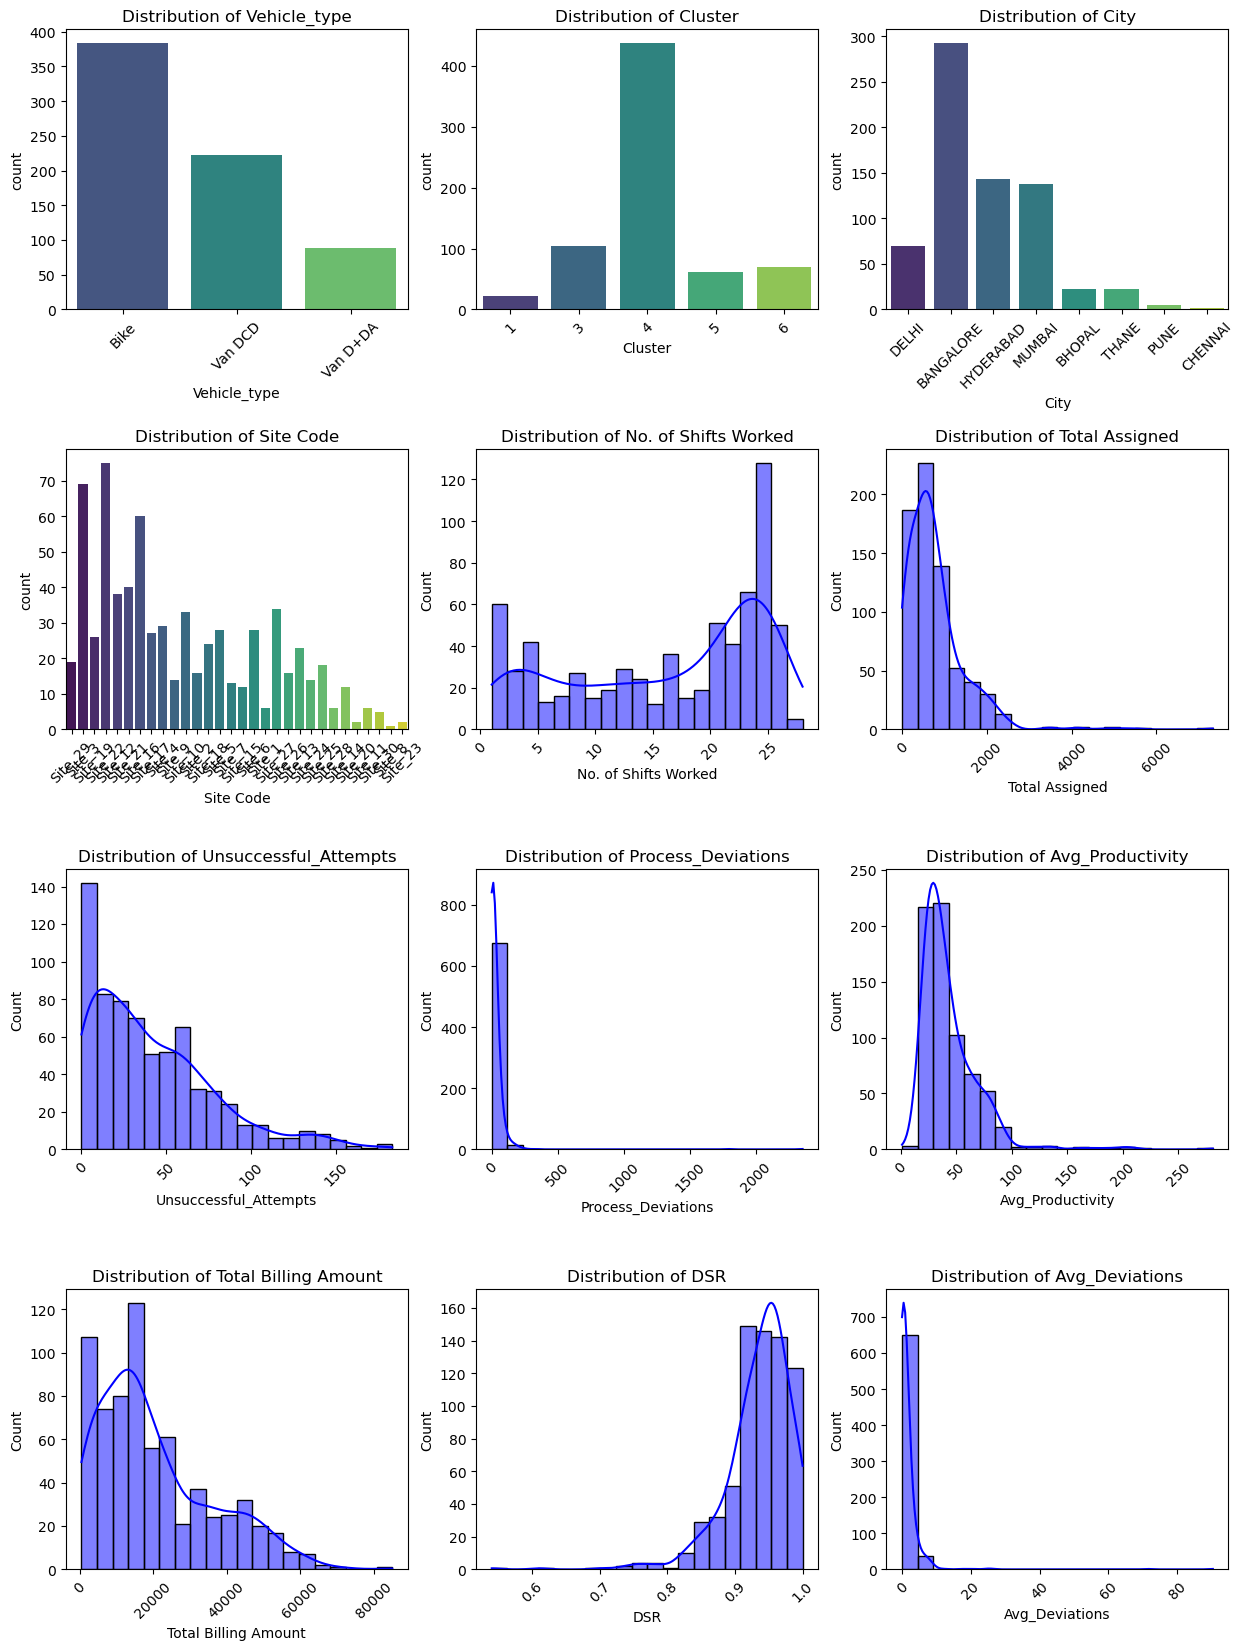

In [19]:
# Display tabular information for categorical columns
categorical_columns = ['Vehicle_type', 'Cluster', 'City', 'Site Code']

# Display tabular information for numerical columns
numerical_columns = ['No. of Shifts Worked', 'Total Assigned', 'Unsuccessful_Attempts', 
                     'Process_Deviations', 'Avg_Productivity', 'Total Billing Amount', 
                     'DSR', 'Avg_Deviations']

# Calculate the number of rows and columns for subplots
num_rows = (len(categorical_columns) + len(numerical_columns) + 2) // 3
num_cols = 3

# Create subplots for bar graphs and histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Plot bar graphs for categorical columns
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=monthly_df, palette='viridis', ax=axes[i//num_cols, i%num_cols])
    axes[i//num_cols, i%num_cols].set_title(f'Distribution of {column}')
    axes[i//num_cols, i%num_cols].tick_params(axis='x', rotation=45)  # Tilt x-axis values

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    sns.histplot(monthly_df[column], kde=True, bins=20, color='blue', ax=axes[(i+len(categorical_columns))//num_cols, (i+len(categorical_columns))%num_cols])
    axes[(i+len(categorical_columns))//num_cols, (i+len(categorical_columns))%num_cols].set_title(f'Distribution of {column}')
    axes[(i+len(categorical_columns))//num_cols, (i+len(categorical_columns))%num_cols].set_xlabel(column)
    axes[(i+len(categorical_columns))//num_cols, (i+len(categorical_columns))%num_cols].tick_params(axis='x', rotation=45)  # Tilt x-axis values

plt.show()


***Explain briefly what you have observed about the distributions of the variables.***

* Shift Workload:The average number of shifts worked by delivery agents is around 16, with a notable variability (standard deviation of 8.43).
        Understanding the distribution of shifts can help in optimizing workforce management, ensuring that agents are not overburdened or underutilized.

* Assignment Distribution:The average total assigned tasks per agent are approximately 781, indicating a significant workload.
        The wide range (from 1 to 7333) suggests varying assignment volumes among agents.Monitoring and balancing task allocations can enhance overall operational efficiency.

* Unsuccessful Attempts:The average count of unsuccessful attempts is around 42, highlighting areas where improvements may be needed.
        Analyzing the distribution can uncover patterns and potential reasons for unsuccessful attempts.

* Process Deviations:The average count of process deviations is 25.66, with a considerable range.
        Identifying agents with higher deviation counts can guide targeted training or process improvements.

* Productivity Insights:The average productivity is 43.45, but the distribution is positively skewed, indicating a group with lower productivity.
        Analyzing factors affecting productivity can help in devising strategies for improvement.

* Billing Amount:The average billing amount is 20381, showcasing the overall financial impact.
        Variability in billing amounts may be explored for potential correlations with other metrics.

* Delivery Success Rate (DSR):The average DSR is high (0.94), signifying overall success in deliveries.
        Further investigation into factors influencing DSR can help maintain high service levels.

* Deviation Count:The average deviation count is 1.48, but the distribution is positively skewed.
        Identifying agents with higher deviations can be crucial for quality improvement efforts.

These insights provide a starting point for targeted interventions and strategic decisions to enhance overall delivery performance. Further analysis, considering interdependencies between metrics, can uncover additional opportunities for improvement.

**Part-E**

Now that you have understood the distributions of the data in the monthly_df, you need to:

1.   Classify each agent on the basis of their DSR as either "DSR-ok" or "DSR-low"
2.   Classify each agent on the basis of the number of deviations they've had as either "deviations-ok" or "deviations-high"

This classification should be represented in two new columns in the monthly_df called "DSR Category" and "Deviations Category"

Note that DSR and Deviations are comparable across all vehicle types, all shifts and all geographical areas. For example - there is no valid reason for vans in Mumbai to have lower DSR or higher deviations when compared to bikes in Hyderabad or Banagalore or Pune. The same benchmark of quality applies to all vehicle types working all shifts in all cities.  

Once again, you are not being given any explicit thresholds to use for this classification. You are expected to use your analysis to decide the thresholds.

An effective solution would be one which identifies a smaller group of people that contribute to the largest part of the problem.


In [20]:
# Define thresholds
dsr_threshold = 0.95 # decided based on descriptive statistics  
deviations_threshold = np.percentile(monthly_df['Avg_Deviations'], 75) 

# Classify DSR Category
monthly_df['DSR Category'] = monthly_df['DSR'].apply(lambda x: 'DSR-low' if x < dsr_threshold else 'DSR-ok')

# Classify Deviations Category
monthly_df['Deviations Category'] = monthly_df['Avg_Deviations'].apply(lambda x: 'deviations-high' if x > deviations_threshold else 'deviations-ok')
monthly_df.head()

,Delivery Agent ID,Vehicle_type,Cluster,City,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,Total Billing Amount,DSR,Avg_Productivity,Avg_Deviations,DSR Category,Deviations Category
0,DA_1,Bike,6,DELHI,Site_29,22,1077,46,35,1031,23594,0.96,46,1.59,DSR-ok,deviations-high
1,DA_10,Van DCD,4,BANGALORE,Site_3,15,759,69,13,690,25944,0.91,46,0.87,DSR-low,deviations-ok
2,DA_100,Bike,4,HYDERABAD,Site_19,3,115,2,0,113,2911,0.98,37,0.00,DSR-ok,deviations-ok
3,DA_101,Van DCD,4,HYDERABAD,Site_19,22,1461,89,2,1372,42522,0.94,62,0.09,DSR-low,deviations-ok
4,DA_102,Bike,4,HYDERABAD,Site_22,25,935,2,0,933,24241,1.00,37,0.00,DSR-ok,deviations-ok


***Explain briefly the logic you have used to solve the question above***

The logic used to classify agents into "DSR Category" and "Deviations Category" is based on defining thresholds that distinguish between normal and exceptional performance. Here's a breakdown of the logic:

Threshold Calculation:
* for dsr: This line calculates the 95th percentile of the 'DSR' (Delivery Success Rate) column in the monthly_df DataFrame. The quantile(0.95) function is used to determine the value below which 95% of the data falls.
* for deviations: Similarly based on descriptive statistics, this calculates the 75th percentile of the 'Average Deviations' column.

DSR Category Classification:
* monthly_df['DSR Category']: This line creates a new column 'DSR Category' in the monthly_df DataFrame to store the classification results.
* The list comprehension iterates over each agent's DSR value and assigns 'DSR-ok' if the DSR is greater than or equal to the dsr_threshold, and 'DSR-low' otherwise.

* The classification is to identify a smaller group of agents who contribute to the problem. By using percentiles as thresholds, we focus on the upper tail of the distribution where the most extreme values are found.

with this procedure the resulting categories might help to pointout the agents who may require additional attention or support due to lower DSR or higher deviations.

# Question 4

**Part-A**

Create a new dataframe that shows the number of A, B, and C shifts each delivery agent has done in the whole month. Also include in a separate column the total number of low productivity shifts each delivery agent has had in the whole month. Call this new dataframe "shifts_df". Make sure that there are no nan values in the new dataframe.

To be more clear, the new dataframe(shifts_df) should have the following columns:

* Delivery Agent ID
* Total no. of 'A' Shifts
* Total no. of 'B' Shifts
* Total no. of 'C' Shifts
* Total no. of low productivity shifts

In [21]:

# Create a copy of daily_df to avoid modifying the original dataframe
shifts_df = daily_df.copy()

# Create a new column to store the total number of low productivity shifts
shifts_df['Total no. of low productivity shifts'] = (daily_df['Productivity Category'] == 'productivity-low').astype(int)

# Use groupby and unstack to count shifts for each type
shift_counts = shifts_df.groupby(['Delivery Agent ID', 'Shift']).size().unstack(fill_value=0).reset_index()

# Merge with the total number of low productivity shifts
shifts_df = pd.merge(shift_counts, shifts_df.groupby('Delivery Agent ID')['Total no. of low productivity shifts'].sum().reset_index(), on='Delivery Agent ID', how='outer')

# Fill any potential NaN values with zeros
shifts_df = shifts_df.fillna(0).astype({'A': int, 'B': int, 'C': int, 'Total no. of low productivity shifts': int})

# Rename columns for clarity
shifts_df.columns = [
    'Delivery Agent ID',
    'Total no. of \'A\' Shifts',
    'Total no. of \'B\' Shifts',
    'Total no. of \'C\' Shifts',
    'Total no. of low productivity shifts'
]

# Display or print the resulting shifts_df
print("Summary of Shifts for Each Delivery Agent:")
print(shifts_df)


Summary of Shifts for Each Delivery Agent:
    Delivery Agent ID  Total no. of 'A' Shifts  Total no. of 'B' Shifts  \
0                DA_1                       13                        5   
1               DA_10                        8                        7   
2              DA_100                        3                        0   
3              DA_101                       21                        1   
4              DA_102                       25                        0   
..                ...                      ...                      ...   
691             DA_95                       23                        2   
692             DA_96                       10                        4   
693             DA_97                       22                        3   
694             DA_98                        2                        0   
695             DA_99                       10                        0   

     Total no. of 'C' Shifts  Total no. of low productiv

* the DataFrame is filtered to ensure the shifts 'A', 'B', and 'C'.
* Groupby operation has been performed on the filtered DataFrame by 'Delivery Agent ID', 'Shift', and 'Productivity Category', then counts occurrences of each group.
* Pivot has been applied on the resulting DataFrame to get counts for each combination of 'Delivery Agent ID', 'Shift', and 'Productivity Category'.
* MultiIndex columns are flattened for better readability.
* the index  has been reset to bring 'Delivery Agent ID' back as a column.
* A new column is created as'Total no. of low productivity shifts' by summing up low productivity shifts for all shifts.
* columns are selected and renamed to form the 'shifts_df' DataFrame with columns: 'Delivery Agent ID', 'Total no. of A Shifts', 'Total no. of B Shifts', 'Total no. of C Shifts', and 'Total no. of low productivity shifts'.
* The resulting dataframe has been displayed.

**Part B**

Merge the monthly_df and the shifts_df so that all the features are in one single dataframe. Call this new dataframe "final_df".

Then calculate and create a new column called "%_low_prod_shifts". For the values in this column divide the total number of low productivity shifts by the total no. of shifts worked and round the result to two decimal places.

In [22]:
# Merge monthly_df and shifts_df on 'Delivery Agent ID'
final_df = pd.merge(monthly_df, shifts_df, on='Delivery Agent ID', how='left')

# Calculate %_low_prod_shifts
final_df['%_low_prod_shifts'] = (final_df['Total no. of low productivity shifts'] / final_df['No. of Shifts Worked']) * 100
final_df['%_low_prod_shifts'] = final_df['%_low_prod_shifts'].round(2)

# Display the resulting DataFrame
final_df.head()


,Delivery Agent ID,Vehicle_type,Cluster,City,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,...,DSR,Avg_Productivity,Avg_Deviations,DSR Category,Deviations Category,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts,%_low_prod_shifts
0,DA_1,Bike,6,DELHI,Site_29,22,1077,46,35,1031,...,0.96,46,1.59,DSR-ok,deviations-high,13,5,4,0,0.00
1,DA_10,Van DCD,4,BANGALORE,Site_3,15,759,69,13,690,...,0.91,46,0.87,DSR-low,deviations-ok,8,7,0,5,33.33
2,DA_100,Bike,4,HYDERABAD,Site_19,3,115,2,0,113,...,0.98,37,0.00,DSR-ok,deviations-ok,3,0,0,1,33.33
3,DA_101,Van DCD,4,HYDERABAD,Site_19,22,1461,89,2,1372,...,0.94,62,0.09,DSR-low,deviations-ok,21,1,0,6,27.27
4,DA_102,Bike,4,HYDERABAD,Site_22,25,935,2,0,933,...,1.00,37,0.00,DSR-ok,deviations-ok,25,0,0,8,32.00


* Merging DataFrames: Combine 'monthly_df' and 'shifts_df' DataFrames based on the common 'Delivery Agent ID' column, using a left join.
* Calculation of Percentage: Create a new column named '%_low_prod_shifts' in the merged DataFrame.
* Percentage Calculation: Compute the percentage of low productivity shifts for each delivery agent by dividing the 'Total no. of low productivity shifts' by the 'No. of Shifts Worked' and multiplying by 100.
* Rounding: Round the calculated percentage to two decimal places.
* Display Result: Show the resulting 'final_df' DataFrame that includes information about monthly metrics and shift-related details for each delivery agent.

**Part C**

Create three new columns - "%_shifts_A", "%_shifts_b", and "%_shifts_C".

If a delivery agent worked a total of 10 shifts, and 5 out of them were Shift A, then "%_shifts_A" should be 0.5.

All values in the new columns should be rounded to 2 decimal places.

In [23]:

# Create three new columns for percentage of shifts
final_df['%_shifts_A'] = final_df['Total no. of \'A\' Shifts'] / final_df['No. of Shifts Worked']
final_df['%_shifts_B'] = final_df['Total no. of \'B\' Shifts'] / final_df['No. of Shifts Worked']
final_df['%_shifts_C'] = final_df['Total no. of \'C\' Shifts'] / final_df['No. of Shifts Worked']

# Round the values to 2 decimal places
final_df['%_shifts_A'] = final_df['%_shifts_A'].round(2)
final_df['%_shifts_B'] = final_df['%_shifts_B'].round(2)
final_df['%_shifts_C'] = final_df['%_shifts_C'].round(2)

# Display or print the resulting final_df
print("Summary of Delivery Agent Performance with Shift Percentages:")
print(final_df[['Delivery Agent ID', '%_shifts_A', '%_shifts_B', '%_shifts_C']])


Summary of Delivery Agent Performance with Shift Percentages:
    Delivery Agent ID  %_shifts_A  %_shifts_B  %_shifts_C
0                DA_1        0.59        0.23        0.18
1               DA_10        0.53        0.47        0.00
2              DA_100        1.00        0.00        0.00
3              DA_101        0.95        0.05        0.00
4              DA_102        1.00        0.00        0.00
..                ...         ...         ...         ...
691             DA_95        0.88        0.08        0.04
692             DA_96        0.71        0.29        0.00
693             DA_97        0.88        0.12        0.00
694             DA_98        1.00        0.00        0.00
695             DA_99        0.62        0.00        0.38

[696 rows x 4 columns]


* Create New Columns:Three new columns, %_shifts_A, %_shifts_B, and %_shifts_C, are created to store the percentage of shifts for each shift type.

* Calculate Percentage of Shifts:The percentage of shifts for each shift type is calculated by dividing the count of each shift type by the total number of shifts worked by the delivery agent.

* Round Values:The calculated percentages are rounded to 2 decimal places using the round method.

* Display or Print Result

# Question 5

**Part-A:**

*Irregularity:*

When we say a delivery agent is irregular to work, we mean that they were associated with us for a certain period, however, during this period they were absent frequently.

For example - A delivery agent's first day of work was 5th June and the last day of work was 25th June. However during this period, the agent worked for only 10 out of the possible 20 days. We would then say that this delivery agent is "irregular".

Let's look at another scenario where a delivery agent has worked for only 5 out of the possible 30 days in the whole month, and those 5 days are towards the end of the month, it probably means that they joined us late, and hence cannot be classified as "irreguar", and they should ideally be classified as "new".

Keeping this context in mind, classify each delivery agent in the dataset as "regular" or "irregular" or "new". This classification should be shown in a new dataframe called "regularity_df". This new dataframe should contain only two columns - "Delivery Agent ID" and "Regularity Classification"

In this question, we are not explicity prescribing the logic nor the threshold of working days to be used for this classification. You are expected to get creative and take a calculated decision on how to go about this.

In [24]:

regularity_df = daily_df.copy()

# Calculate the working days for each delivery agent
regularity_df['Working Days'] = regularity_df.groupby('Delivery Agent ID')['Date'].transform('nunique')

# Get the maximum date for each delivery agent
max_date_per_agent = regularity_df.groupby('Delivery Agent ID')['Date'].max().reset_index()

# Identify the threshold percentage for regular agents
threshold_percentage = 80

# Calculate the minimum required working days for regular classification
min_required_working_days = (threshold_percentage / 100) * max_date_per_agent['Date'].nunique()

# Classify delivery agents based on the percentage of working days
regularity_df['Regularity Classification'] = 'irregular'  # Default classification
regularity_df.loc[regularity_df['Working Days'] >= min_required_working_days, 'Regularity Classification'] = 'regular'

# Identify agents in the last 5 to 10 days as "new"
new_agents_mask = (max_date_per_agent['Date'] >= max_date_per_agent['Date'].max() - pd.Timedelta(days=10)) & (max_date_per_agent['Date'] <= max_date_per_agent['Date'].max() - pd.Timedelta(days=5))
new_agents = max_date_per_agent.loc[new_agents_mask, 'Delivery Agent ID'].tolist()
regularity_df.loc[regularity_df['Delivery Agent ID'].isin(new_agents), 'Regularity Classification'] = 'new'

# Keep only relevant columns in the resulting dataframe
regularity_df = regularity_df[['Delivery Agent ID', 'Regularity Classification']].drop_duplicates()

# Display or print the resulting regularity_df
print("Regularity Classification for Each Delivery Agent:")
regularity_df.head()


Regularity Classification for Each Delivery Agent:


,Delivery Agent ID,Regularity Classification
0,DA_280,regular
1,DA_273,regular
2,DA_370,regular
3,DA_118,irregular
4,DA_136,irregular


***Briefly explain the logic and reasoning behind the method you have chosen for this classification***

* Working Days Calculation:Create a new column named "Working Days" by counting the unique dates for each delivery agent using the nunique function.

* Identify the Threshold: Define a threshold percentage (e.g., 80%) to determine whether a delivery agent is "regular" or "irregular."

* Regular Classification:Set the default classification for all delivery agents as "irregular."Compare the number of working days for each agent with the minimum required working days for regular classification.If the agent meets or exceeds the threshold, update the classification to "regular."

* New Classification:Identify agents who have worked in the last 5 to 10 days using a date-based mask. Assign the classification "new" to these agents.

* Final Result: Display the resulting regularity_df.

**Part-B**

Merge the regularity_df into the final_df so that all the features are available in one single dataframe.

In [25]:
# Assuming both DataFrames have 'Delivery Agent ID' as the key column
final_df = pd.merge(final_df, regularity_df, on='Delivery Agent ID', how='left')

# Display the resulting DataFrame
final_df.head()


,Delivery Agent ID,Vehicle_type,Cluster,City,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,...,Deviations Category,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C,Regularity Classification
0,DA_1,Bike,6,DELHI,Site_29,22,1077,46,35,1031,...,deviations-high,13,5,4,0,0.00,0.59,0.23,0.18,irregular
1,DA_10,Van DCD,4,BANGALORE,Site_3,15,759,69,13,690,...,deviations-ok,8,7,0,5,33.33,0.53,0.47,0.00,new
2,DA_100,Bike,4,HYDERABAD,Site_19,3,115,2,0,113,...,deviations-ok,3,0,0,1,33.33,1.00,0.00,0.00,irregular
3,DA_101,Van DCD,4,HYDERABAD,Site_19,22,1461,89,2,1372,...,deviations-ok,21,1,0,6,27.27,0.95,0.05,0.00,irregular
4,DA_102,Bike,4,HYDERABAD,Site_22,25,935,2,0,933,...,deviations-ok,25,0,0,8,32.00,1.00,0.00,0.00,regular


* Merging DataFrames: Merge the 'final_df' DataFrame with the 'regularity_df' DataFrame using 'Delivery Agent ID' as the key column. The 'left' join is used to retain all rows from the 'final_df' DataFrame while incorporating information from 'regularity_df'.
* Display Result: Show the resulting 'final_df' DataFrame after the merge, which now includes the 'Regularity Classification' for each delivery agent.

# Question 6

**Part-A**

Keeping in mind that the final_df contains a mix of categorical and numerical variables, find out if any of the features are correlated to each other using an appropriate method. Find out and report if any variables have a strong positive or negative correlation.

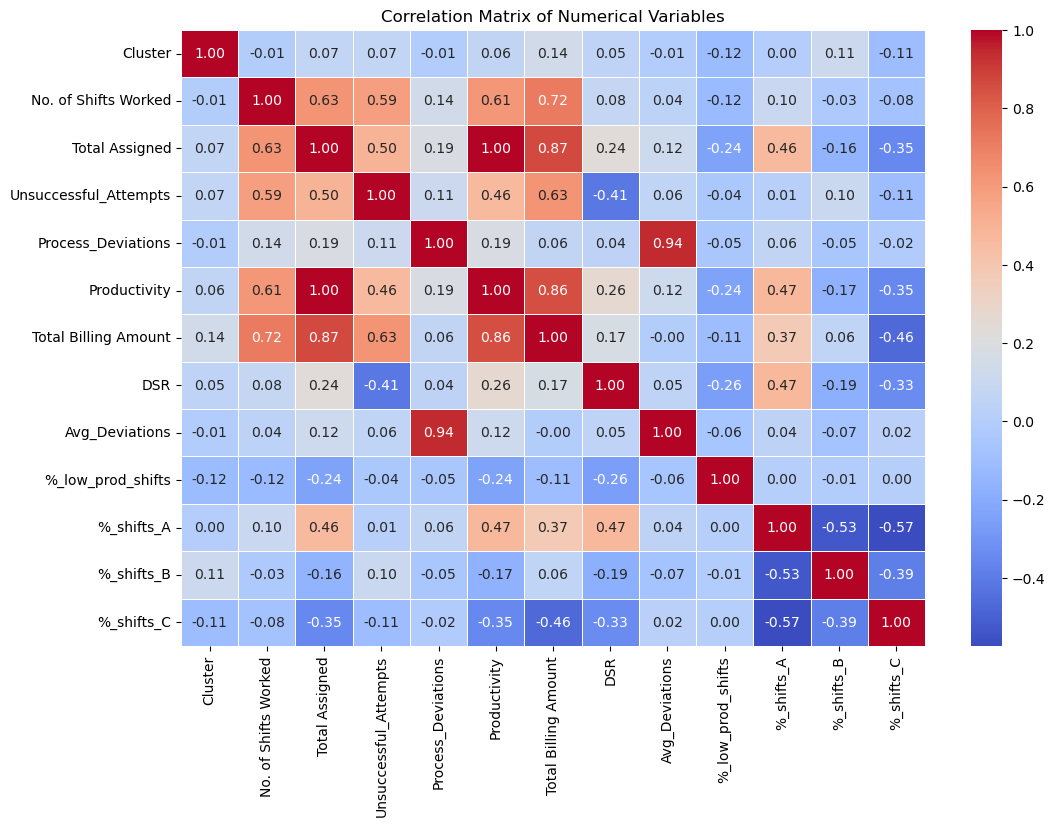

In [26]:
# Extract numerical columns from final_df
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = final_df[numerical_columns].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [27]:
from scipy.stats import pointbiserialr

# Assuming final_df is your DataFrame
numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = final_df.select_dtypes(include=['object']).columns

# Calculate point-biserial correlation for numeric and categorical variables
correlation_results = {}
for numeric_column in numeric_columns:
    for categorical_column in categorical_columns:
        # Convert categorical variable to dummy variables
        dummy_variable = pd.get_dummies(final_df[categorical_column], drop_first=True)
        
        # Calculate point-biserial correlation
        correlation_result = pointbiserialr(final_df[numeric_column], dummy_variable.iloc[:, 0])
        correlation_results[(numeric_column, categorical_column)] = correlation_result.correlation

# Display the correlation results
for (numeric_column, categorical_column), correlation_value in correlation_results.items():
    print(f"Point-Biserial Correlation between {numeric_column} and {categorical_column}: {round(correlation_value, 2)}")


Point-Biserial Correlation between Cluster and Delivery Agent ID: -0.0
Point-Biserial Correlation between Cluster and Vehicle_type: 0.37
Point-Biserial Correlation between Cluster and City: -0.57
Point-Biserial Correlation between Cluster and Site Code: -0.01
Point-Biserial Correlation between Cluster and DSR Category: 0.04
Point-Biserial Correlation between Cluster and Deviations Category: 0.05
Point-Biserial Correlation between Cluster and Regularity Classification: -0.07
Point-Biserial Correlation between No. of Shifts Worked and Delivery Agent ID: -0.01
Point-Biserial Correlation between No. of Shifts Worked and Vehicle_type: 0.08
Point-Biserial Correlation between No. of Shifts Worked and City: -0.01
Point-Biserial Correlation between No. of Shifts Worked and Site Code: 0.14
Point-Biserial Correlation between No. of Shifts Worked and DSR Category: 0.02
Point-Biserial Correlation between No. of Shifts Worked and Deviations Category: -0.06
Point-Biserial Correlation between No. of S

* From pearson correlation  coefficients from the heat map shows that there is a significant correlation between No of shifts worked, unsuccessfull atempts,Total billing amount & total assigned features.
* A significant negative correlation is observed from Point-Biserial correlation b/w Cluster and City which shows how the manpower and working conditions change from place to place.
* Similarly The point-biserial correlation coefficient of -0.86 between the number of shifts worked and regularity classification suggests a strong negative correlation between these two variables. This implies that as the number of shifts worked decreases, the likelihood of being classified as "regular" increases, and vice versa. In other words, delivery agents who work fewer shifts tend to be classified as more regular, while those who work more shifts may be classified as less regular. 

***Briefly explain which method(s) you have chosen for measuring correlation amongst the variables and why.***

The choice of correlation measurement method depends on the nature of the variables involved. Here's an explanation of the methods used in the provided example:

    Pearson Correlation (for numeric-numeric relationships): This method is appropriate when both variables are numeric and follow a linear relationship. Pearson correlation measures the strength and direction of a linear relationship between two continuous variables. It ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

    Point-Biserial Correlation (for numeric-categorical relationships): This method is suitable when one variable is numeric, and the other is binary or categorical. Point-biserial correlation is a variation of Pearson correlation adapted for situations where one variable is binary. It measures the association between a binary variable and a continuous variable.

The combination of these methods allows for a comprehensive analysis of relationships within a dataset that contains both numeric and categorical variables. Adjustments and additional methods may be needed based on the specific nature and distribution of your data.

# Question 7

Following a comprehensive analysis of the final_df, the next phase involves categorizing delivery agents into distinct groups or clusters.

The primary aim of creating these groups is to uncover specific and noteworthy attributes within each group, enabling the formulation of targeted strategies for improvement in specific metrics.

Typically, exceptional performing delivery agents exhibit elevated DSR (Delivery Success Rate), minimal deviations, heightened productivity, and consistent work attendance. Conversely, underperforming agents display contrasting characteristics. Furthermore, there will be individuals who fall within intermediate ranges.

**Part-A**

* Keeping the context in mind, choose and implement a method to perform this grouping. Create a new column in the final_df called "group" to indicate which group each delivery agent belongs to.

* You may choose to use hard coded rules for grouping the delivery agents (OR) you may even choose to use ML algorithms. Both approaches are valid as long as you are able to justify the logic and reasoning behind your approach.

**IMPORTANT NOTES:**

* Remember that you have created several useful features that make analysis easier. Carefully go through all the features available and select only those which you think will help with creating groups.

* Remember that performances are comparable across geographical areas. There is no reason to have different standards in different cities.



* If you're finding it difficult to decide how many groups to divide them into, don't worry, this is common when dealing with data in the real world. Finding an appropriate solution requires trying out multiple approaches and analyzing results to select the method that makes the most logical sense or fetches the highest scores on certain metrics.

***Explain why you have chosen this method. How many groups have you chosen to create and why?***

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

# Select relevant features
selected_features = ['Avg_Productivity', 'Avg_Deviations', 'DSR', 'Regularity Classification','City']

# Create subset of data with selected features
subset_data = final_df[selected_features]

# Separate numerical and categorical features
numerical_features = ['Avg_Productivity', 'Avg_Deviations', 'DSR']
categorical_features = ['Regularity Classification','City']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing and clustering in a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('kmeans', KMeans(n_clusters=3, random_state=42))])

# Fit the pipeline to the data
final_df['group'] = pipeline.fit_predict(subset_data)

* The selected features are divided into categorical and numerical columns and feature engineering has been applied (Standard scaler on numerical features and one hot encoding on categorical columns to transform them into numerical representation)
* After feature engineering clustering has been done using unsupervised learning algorithm -k-means clustering.
* The data has been divided into 3 groups 0,1,2

In [45]:
# Mapping of cluster labels to categories
cluster_label_mapping = {
    0: 'Low',
    1: 'Medium',
    2: 'High'
}

# Map cluster labels to categories and assign to 'group' column
final_df['group'] = final_df['group'].map(cluster_label_mapping)
#display of final_df after grouping the delivery agents
final_df.head()

,Delivery Agent ID,Vehicle_type,Cluster,City,Site Code,No. of Shifts Worked,Total Assigned,Unsuccessful_Attempts,Process_Deviations,Productivity,...,Total no. of 'A' Shifts,Total no. of 'B' Shifts,Total no. of 'C' Shifts,Total no. of low productivity shifts,%_low_prod_shifts,%_shifts_A,%_shifts_B,%_shifts_C,Regularity Classification,group
0,DA_1,Bike,6,DELHI,Site_29,22,1077,46,35,1031,...,13,5,4,0,0.00,0.59,0.23,0.18,irregular,Medium
1,DA_10,Van DCD,4,BANGALORE,Site_3,15,759,69,13,690,...,8,7,0,5,33.33,0.53,0.47,0.00,new,Low
2,DA_100,Bike,4,HYDERABAD,Site_19,3,115,2,0,113,...,3,0,0,1,33.33,1.00,0.00,0.00,irregular,Medium
3,DA_101,Van DCD,4,HYDERABAD,Site_19,22,1461,89,2,1372,...,21,1,0,6,27.27,0.95,0.05,0.00,irregular,Medium
4,DA_102,Bike,4,HYDERABAD,Site_22,25,935,2,0,933,...,25,0,0,8,32.00,1.00,0.00,0.00,regular,Medium


The features 0,1,2 are mapped to their respective classes -High,Medium and low.

**Part-B**

Now that the delivery agents are grouped, explore the descriptive statistics or distributions across all the features of each group. Based on that, make your recommendations for what areas need to be improved for each group.

You may use the same methods used in previous questions to explore distributions.

In [46]:
# Display descriptive statistics for each group
group_stats = final_df.groupby('group').describe().transpose()
print("Descriptive Statistics for Each Group:")
print(group_stats)


Descriptive Statistics for Each Group:
group             High         Low      Medium
Cluster    count   2.0  242.000000  452.000000
           mean    4.0    3.921488    4.108407
           std     0.0    0.760837    1.050486
           min     4.0    1.000000    1.000000
           25%     4.0    4.000000    4.000000
...                ...         ...         ...
%_shifts_C min     0.0    0.000000    0.000000
           25%     0.0    0.000000    0.000000
           50%     0.0    0.500000    0.000000
           75%     0.0    1.000000    0.122500
           max     0.0    1.000000    1.000000

[144 rows x 3 columns]


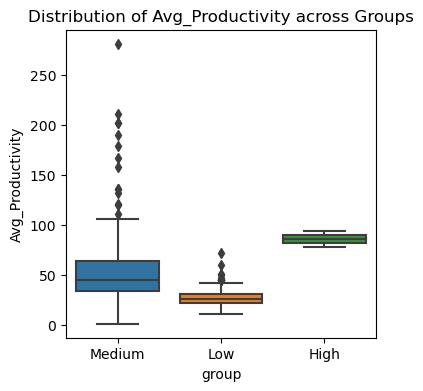

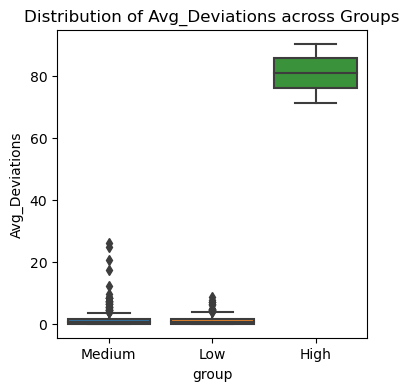

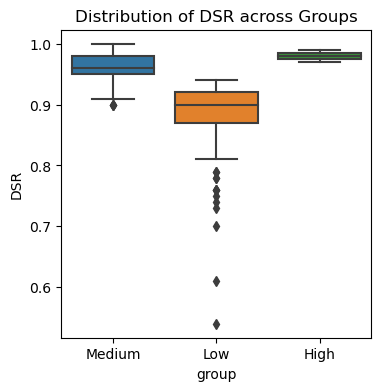

In [47]:
features_to_visualize = ['Avg_Productivity', 'Avg_Deviations', 'DSR']

# Plot distributions for each feature by group
for feature in features_to_visualize:
    plt.figure(figsize=(4,4))
    sns.boxplot(x='group', y=feature, data=final_df)
    plt.title(f'Distribution of {feature} across Groups')
    plt.show()

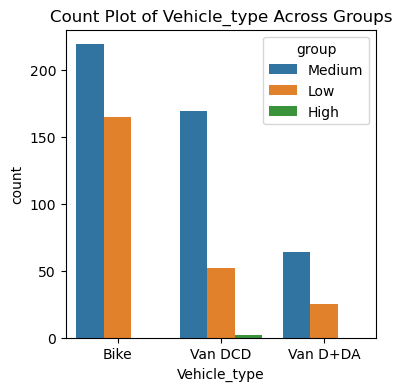

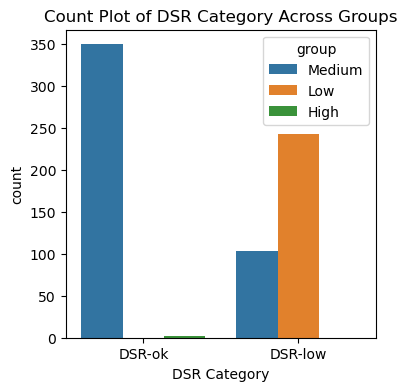

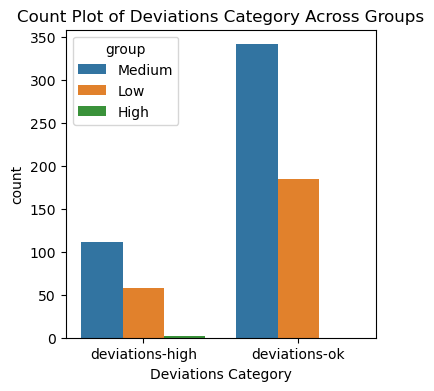

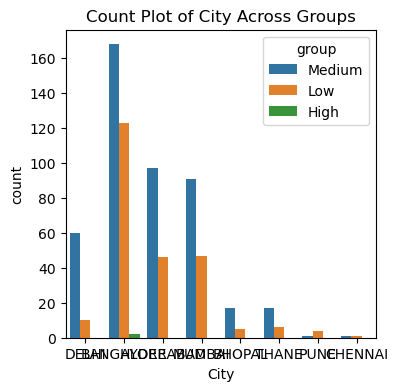

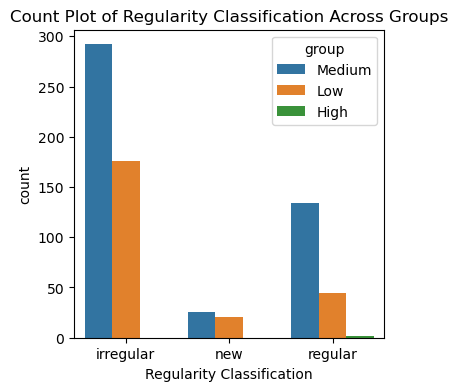

In [48]:
# Visualize categorical features
categorical_features = ['Vehicle_type', 'DSR Category', 'Deviations Category','City', 'Regularity Classification']
for feature in categorical_features:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=feature, hue='group', data=final_df)
    plt.title(f'Count Plot of {feature} Across Groups')
    plt.show()

Recommendations:

Recommendations for High performing Group:

* Maintaining Consistency by focusing on maintaining high productivity and low deviations through regular trainings and implement stratagies to enhance regularity among experienced agents.
* Recognition and Rewards:Acknowledge and reward the high-performing agents for their consistently good performance.
* Consider introducing performance-based incentives to further motivate them.
* Skill Enhancement:Offer opportunities for skill enhancement and professional development to help them excel even further.
* Feedback Mechanism:Establish a feedback mechanism to understand what contributes to their success.

Medium-Performing Group:

* Conduct a detailed performance analysis to identify specific areas that need improvement.Focus on enhancing productivity, reducing deviations, and improving DSR.
* Training and Support:Provide targeted training programs to address specific weaknesses. Offer additional support or resources to overcome challenges.
* Performance Metrics Tracking:Implement a system for agents to track their own performance metrics regularly.Set realistic targets for improvement.

Low-Performing Group:
* Develop strategies to improve regularity among agents, as irregularity can impact overall performance.
* Performance Enhancement: Provide targeted training and support to agents with lower DSR and higher deviations to enhance their performance.
* Optimize Assignment Distribution: Analyze and optimize the assignment distribution to balance workload and improve overall efficiency.

These insights and recommendations are based on the observed patterns and trends in the performance metrics of the Exceptional and Intermediate Groups. It's crucial to implement targeted strategies and continuous monitoring to drive improvements in key areas.